# Human Diffusion

### A Q-Learning Process About The Human Migration From Africa

We start by importing the proper modules (equivalent to libraries in R).

These are

- NumPy
- MatPlotLib
- PIL, (Pillow) an image handler
- tqdm, (pronounced ta-qa-dum) from Arabic (taqadum, تقدّم) meaning *progress*, is a simple progress bar to be able to estimate the time for each task



In [1]:
#pip install -r requirements.txt

In [10]:
from earth import Earth

## Generating the Map
We initialise the picture that we want to use, and convert it into pixel values, so we can have a pure black and white image of the earth to use.

In [13]:
stage = Earth('earth.jpg')

The following forloop checks each individual pixel and the converts it to black or white. The threshold was found through running the loop many times and picking a number that looked good enough.

In [14]:
stage.black_and_white('newPixels.csv', 'pure-bw-earth.jpg')

100%|██████████████████████████████████████████████████████████| 2407680/2407680 [00:00<00:00, 4242516.17it/s]


We then generate the new picture and save it before we convert it into an array.

In [15]:
stage.generate_image('pure-bw-earth.jpg')

100%|████████████████████████████████████████████████████████████████████| 1254/1254 [00:02<00:00, 449.37it/s]


We are now ready to create the map we will need.

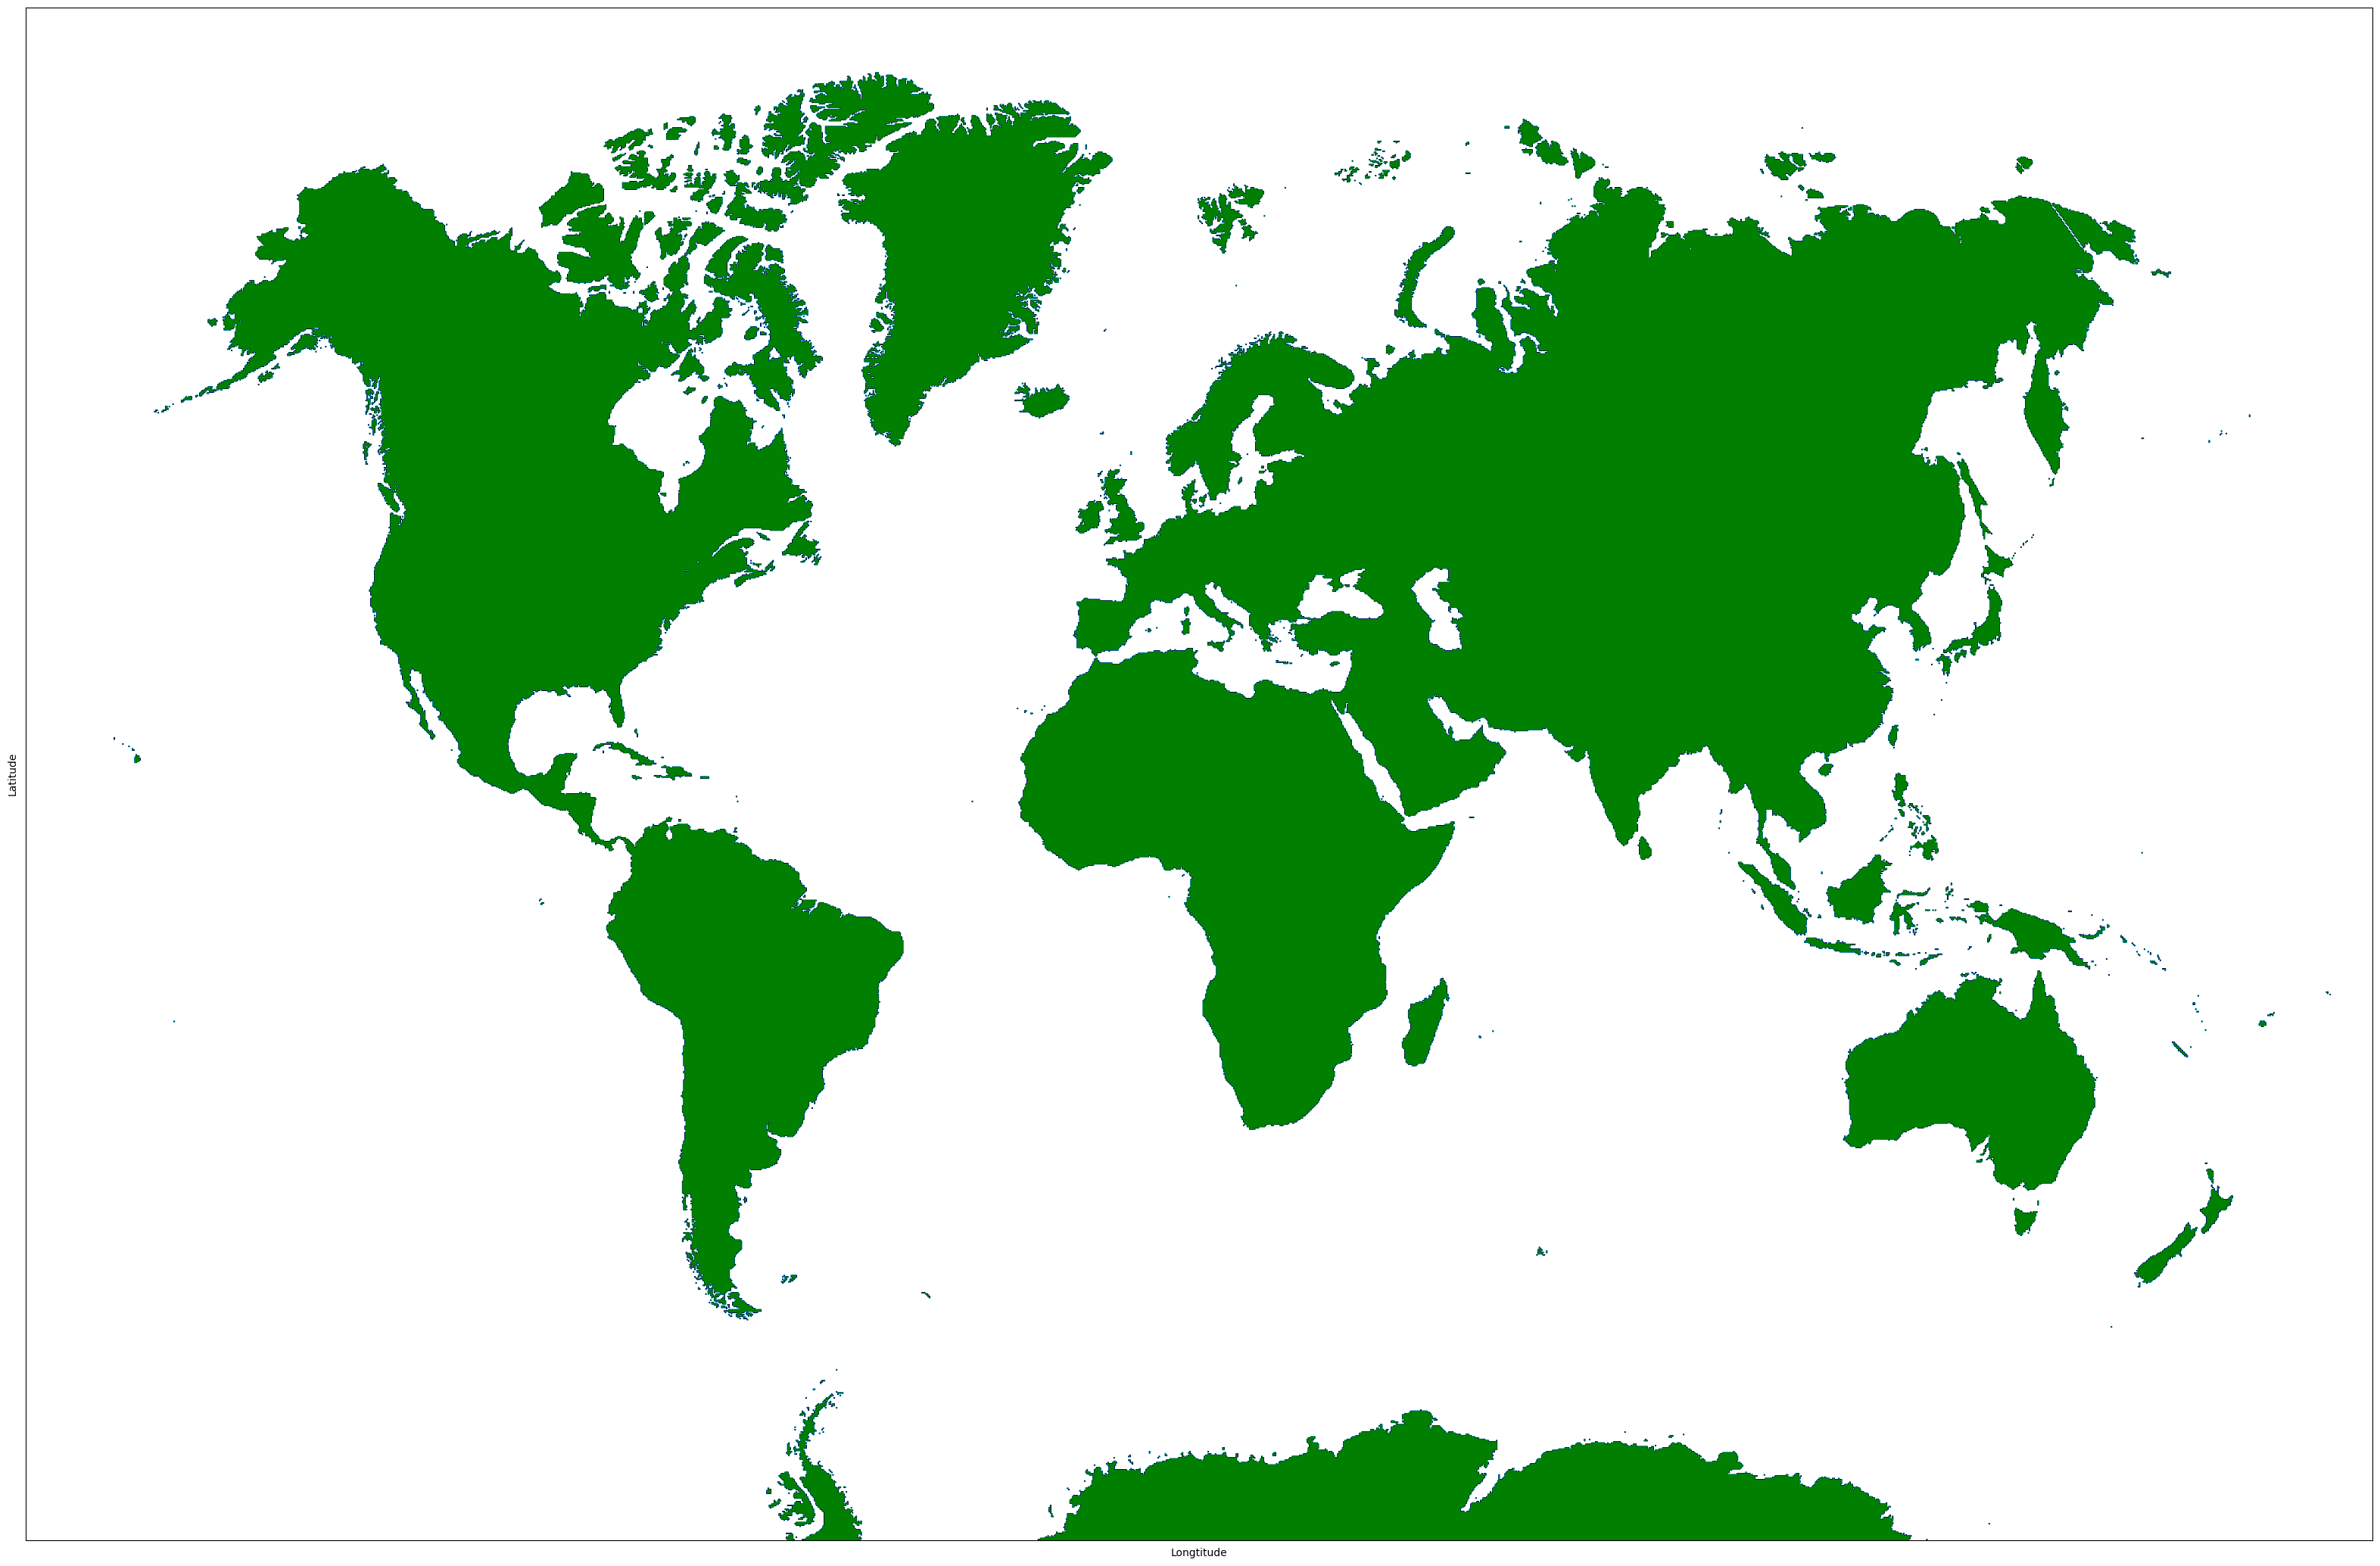

In [16]:
stage.plot('map.jpg')

Now that we have our map ready, we can move on to the implementation of the algorithm.

## The Timeline of Human Migration

The general accepted theory is that the first humans emerged in the Horn of Africa (Modern Day Ethiopia, Somalia and Eritrea), about 198 thousand years ago[1]. After 

![](migrationwaves.png)

## Q-Learning

First we need to define the actions that the program will use, which will be the ability to go north, south, west, and east.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
actions = ['north', 'south', 'west', 'east']

Then we can generate the Q-map, which gives the rewards.

In [115]:
qmap = np.ones(shape=(stage.height,stage.width))
qmap[np.where(stage.map > 0)] = -100

#AFRICA
    #Ethiopia
qmap[680:690, 1105:1115] = 100

    #Egypt
qmap[575:585, 1045:1055] = 100

    #South Africa
qmap[855:865, 1045:1055] = 100

    #Mali
qmap[660:670, 905:915] = 100

    #Kongo
qmap[750:760, 975:985] = 100

    #North Africa
qmap[550:560, 905:915] = 100



#ASIA
    #China
qmap[575:585, 1475:1485] = 100

    #India
qmap[585:595, 1265:1275] = 100

    #Caucasus
qmap[485:495, 1120:1130] = 100

#EUROPE
    #Haemos
qmap[480:490, 1015:1025] = 100

    #Italy
qmap[480:490, 955:965] = 100

    #Russia
qmap[405:415, 1070:1080] = 100

    #Germania
qmap[435:445, 955:965] = 100

    #Iberia
qmap[500:510, 875:885] = 100

    #France
qmap[460:470, 910:920] = 100


#MIDDLE EAST
    #Hattusa
qmap[510:520, 1060:1070] = 100

    #Arabia
qmap[620:630, 1140:1150] = 100

    #Assyria
qmap[540:550, 1100:1110] = 100



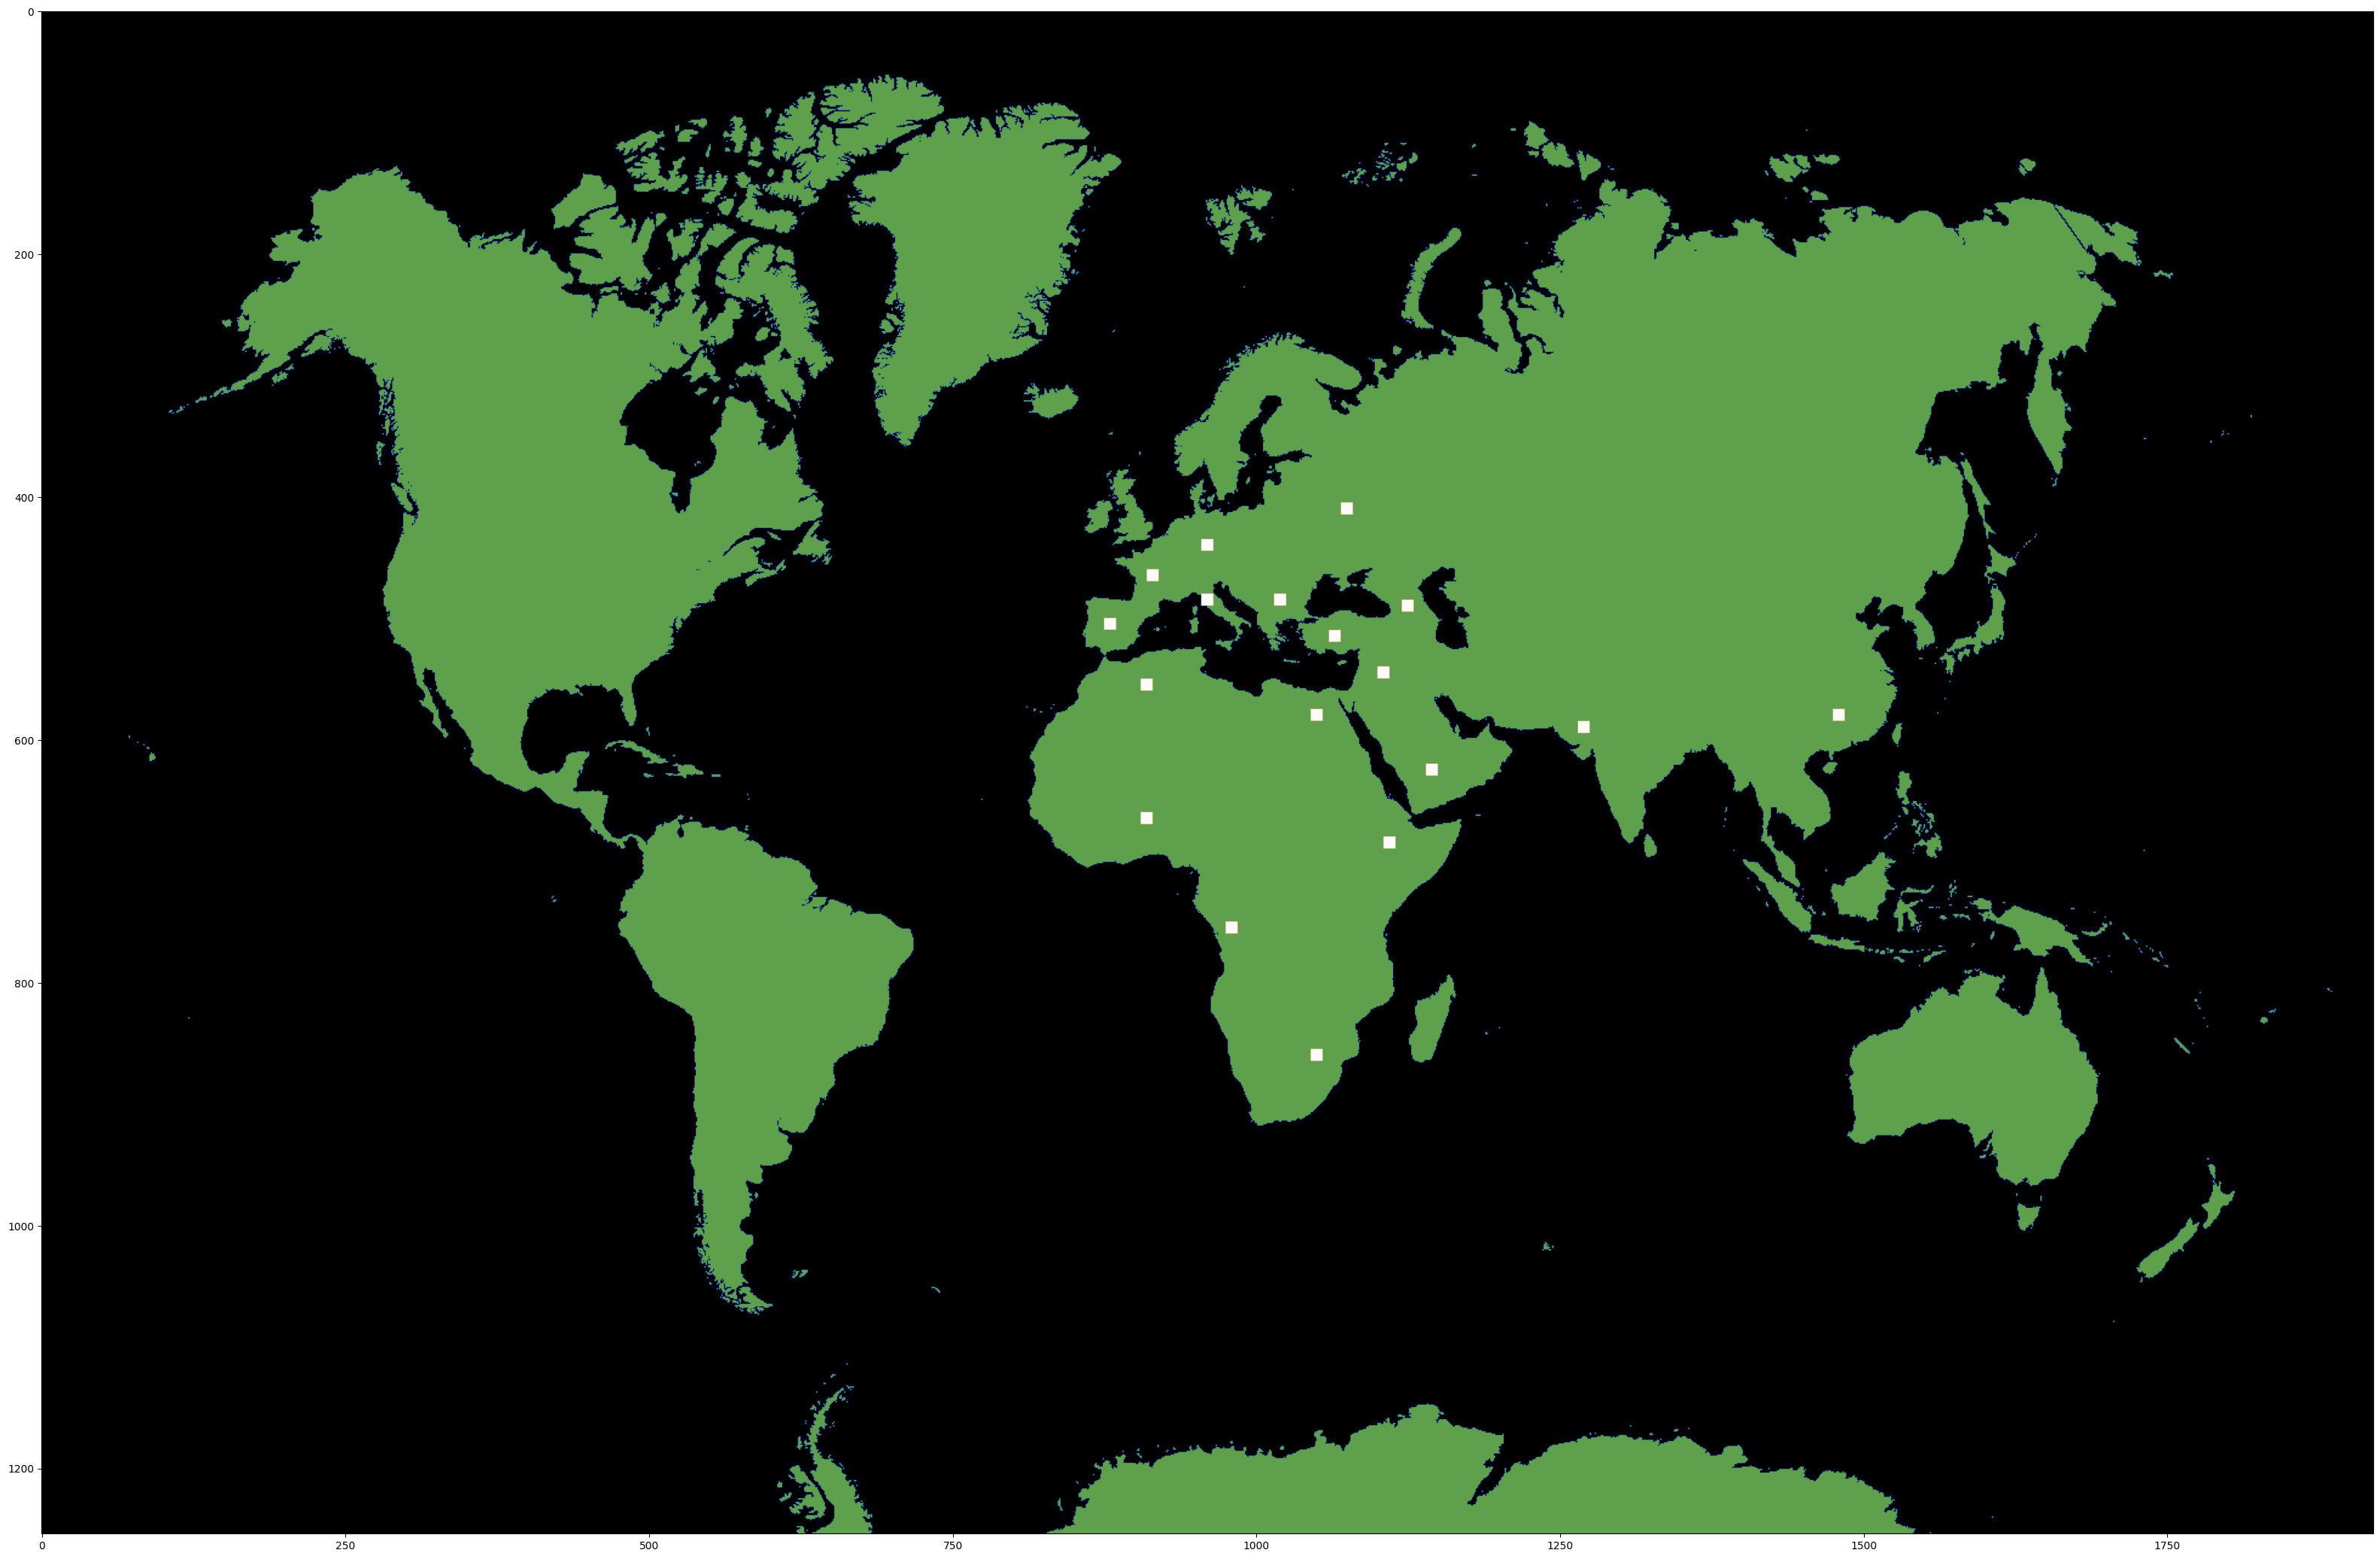

In [116]:
plt.figure(figsize=(40,40))
plt.imshow(qmap, cmap='gist_earth')
plt.show()

## References

[1] McDougall, I., Brown, F. & Fleagle, J. *Stratigraphic placement and age of modern humans from Kibish, Ethiopia.* **Nature** 433, 733–736 (2005). https://doi.org/10.1038/nature03258

[2] López S, van Dorp L, Hellenthal G. *Human Dispersal Out of Africa: A Lasting Debate.* **Evol Bioinform Online.** 2016 Apr 21; 11(Suppl 2):57-68. doi: https://doi.org/10.4137/EBO.S33489

[3] Yang M. *A genetic history of migration, diversification, and admixture in Asia.* **Hum Popul Genet Genom.** 2022; 2(1):0001. https://doi.org/10.47248/hpgg2202010001